<a href="https://colab.research.google.com/github/pankaj18/tensorflow_for_ml_and_dl/blob/master/transfer_learning_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model

In [0]:
import os
import zipfile


# download pretrained inception model

In [4]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-05-08 11:51:50--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.28.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.28.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   112MB/s    in 0.8s    

2020-05-08 11:51:51 (112 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [0]:
local_weights_file='/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [0]:
pretrained_model=InceptionV3(input_shape=(150,150,3),include_top=False,weights=None)

In [0]:
pretrained_model.load_weights(local_weights_file)

In [0]:
#pretrained_model.summary()

In [10]:
last_layer=pretrained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)

last layer output shape:  (None, 7, 7, 768)


In [0]:
last_output=last_layer.output

In [0]:
#flatten last layer
x=layers.Flatten()(last_output)
x=layers.Dropout(0.2)(x)
#add dense layer with 1024 hidden units and relu activation
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dense(1,activation='sigmoid')(x)


In [0]:
from tensorflow.keras.optimizers import RMSprop
model=Model(pretrained_model.input,x)
model.compile(optimizer=RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

--2020-05-08 11:54:06--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   119MB/s    in 0.6s    

2020-05-08 11:54:07 (119 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [17]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

# Flow validation images in batches of 20 using test_datagen generator
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 20s - loss: 0.7794 - accuracy: 0.7010 - val_loss: 29.6524 - val_accuracy: 0.5090
Epoch 2/20
100/100 - 19s - loss: 0.5049 - accuracy: 0.7830 - val_loss: 1441.5544 - val_accuracy: 0.4990
Epoch 3/20
100/100 - 18s - loss: 0.4519 - accuracy: 0.8230 - val_loss: 17.0419 - val_accuracy: 0.4940
Epoch 4/20
100/100 - 18s - loss: 0.3841 - accuracy: 0.8405 - val_loss: 2.5033 - val_accuracy: 0.8190
Epoch 5/20
100/100 - 18s - loss: 0.3958 - accuracy: 0.8520 - val_loss: 4.9323 - val_accuracy: 0.8610
Epoch 6/20
100/100 - 18s - loss: 0.3708 - accuracy: 0.8535 - val_loss: 3.1260 - val_accuracy: 0.8170
Epoch 7/20
100/100 - 18s - loss: 0.3739 - accuracy: 0.8615 - val_loss: 1.6836 - val_accuracy: 0.8380
Epoch 8/20
100/100 - 18s - loss: 0.3461 - accuracy: 0.8770 - val_loss: 9.4031 - val_accuracy: 0.6780
Epoch 9/20
100/100 - 18s - loss: 0.2771 - accuracy: 0.9000 - val_loss: 4.4955 - val_accuracy: 0.7190
Epoch 10/20
100/100 - 18s - loss: 0.2904 - accuracy: 0.8775 - val_loss: 2.2324 - val_a

In [0]:
plt.style.use('dark_background')

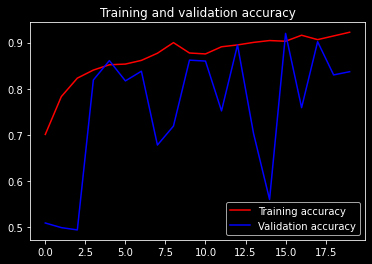

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()